<a href="https://colab.research.google.com/github/kovandras/ActFun/blob/master/DeepLearning_HW_ActFun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiple gated activation function 
###Deep learning Homework ActFun

This homework's topic has been discussed with dr. Gyires-Tóth Bálint.

The topic of this homework is to evaluate the effectiveness of a new type of activation function which is a superposition of previously established activation functions (tanh, relu, sigmoid...) with learnable weights. From now on referred to as WSGAF (Weighted Superposition Gated Function)

![Weighted superposition gated activation function](https://i.imgur.com/QF58qzV.png)

We expect this new method to outperform previous heuristics to determine the best activation to use in a certain layer, because this method gets rid of this hyperparameter for every layer and makes the network learn it for itself.

We will evaluate two ways to do this. The first method (WSGAF-1) is to use separate weights for each neuron. (This method should provide more flexibility for the network, but is also expected to substantially increase learning times, because of the extra weights.)
The second method (WSGAF-2) uses the same weights per layer. (This format is similar to existing structures)

## Previous works

We have not found any previous implementation of this idea, however success has been achieved with a similar self-gated activation function [arXiv:1710.05941 [cs.NE]](https://arxiv.org/abs/1710.05941). 

##Evaluation

To evaluate this method, we are going to use a simple six-layer convolutional network (784-50-100-500-1000-10-10) on the MNIST database and Inception ResNet-v2 with CIFAR-10 dataset. These networks cover a wide range of layer types including Convolution, AvgPool, MaxPool, Concat, Dropout, FullyConnected, SoftMax. First, we are going to determine baseline performance of these networks by training them with nominal hyperparameter settings, then we are going to replace all of the activation function in these networks with WSGAF-1/2.

We are going to compare the resulting: 

*   Training time
*   Performance after a fix number of epochs

for each version of both networks.
Even if our results are on par with the baseline scores, our method will be considered preferable to other activation functions, because this method decreases the hyperparameter search space. 






In [1]:
from tensorflow.contrib.slim.nets import resnet_v2
import tensorflow as tf
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
#MNIST dataset preprocessing

from keras.datasets import mnist


(x_train_valid_mnist, y_train_valid_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
mnist_valid_split = 0.2

nb_mnist_samples = x_train_valid_mnist.shape[0]
# split input data into train and validation sets
x_train_mnist = x_train_valid_mnist[0:int(nb_mnist_samples*(1-mnist_valid_split))]
x_valid_mnist = x_train_valid_mnist[int(nb_mnist_samples*(1-mnist_valid_split)):]

# split output data into train and validation sets
y_train_mnist = y_train_valid_mnist[0:int(nb_mnist_samples*(1-mnist_valid_split))]
y_valid_mnist = y_train_valid_mnist[int(nb_mnist_samples*(1-mnist_valid_split)):]

# we do this so we can fill the data into a simple regression model, for a baseline evaluation
x_train_mnist = x_train_mnist.reshape(-1, 784)
x_valid_mnist = x_valid_mnist.reshape(-1, 784)
x_test_mnist = x_test_mnist.reshape(-1, 784)

x_train_mnist = x_train_mnist.astype('float32')
x_valid_mnist = x_valid_mnist.astype('float32')
x_test_mnist = x_test_mnist.astype('float32')

# 0..1 values
x_train_mnist = x_train_mnist/255
x_valid_mnist = x_valid_mnist/255
x_test_mnist = x_test_mnist/255

y_train_mnist = y_train_mnist.reshape(-1, 1)
y_valid_mnist = y_valid_mnist.reshape(-1, 1)
y_test_mnist = y_test_mnist.reshape(-1, 1)


#Convert output to one-hot coding
y_train_mnist = np_utils.to_categorical(y_train_mnist, 10)
y_valid_mnist = np_utils.to_categorical(y_valid_mnist, 10)
y_test_mnist = np_utils.to_categorical(y_test_mnist, 10)

11493376/11490434 [==============================] - 1s 0us/step


170500096/170498071 [==============================] - 43s 0us/step
Ship


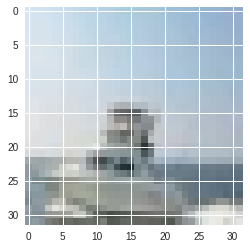

In [3]:
#CIFAR-10
from tensorflow.contrib.slim.nets import resnet_v2
import tensorflow as tf
from keras.utils import np_utils
from keras.datasets import cifar10

(x_train_valid_cifar10, y_train_valid_cifar10), (x_test_cifar10, y_test_cifar10) = cifar10.load_data()
cifar10_valid_split = 0.2

nb_cifar10_samples = x_train_valid_cifar10.shape[0]
# split input data into train and validation sets
x_train_cifar10 = x_train_valid_cifar10[0:int(nb_cifar10_samples*(1-cifar10_valid_split))]
x_valid_cifar10 = x_train_valid_cifar10[int(nb_cifar10_samples*(1-cifar10_valid_split)):]

# split output data into train and validation sets
y_train_cifar10 = y_train_valid_cifar10[0:int(nb_cifar10_samples*(1-cifar10_valid_split))]
y_valid_cifar10 = y_train_valid_cifar10[int(nb_cifar10_samples*(1-cifar10_valid_split)):]

# x_train_cifar10 = x_train_cifar10.astype('float32')
# x_valid_cifar10 = x_valid_cifar10.astype('float32')
# x_test_cifar10 = x_test_cifar10.astype('float32')

# this is done in tf when passing the image to the network
# x_train_cifar10 = x_train_cifar10/255
# x_valid_cifar10 = x_valid_cifar10/255
# x_test_cifar10 = x_test_cifar10/255


#Convert output to one-hot coding
y_train_cifar10 = np_utils.to_categorical(y_train_cifar10, 10)
y_valid_cifar10 = np_utils.to_categorical(y_valid_cifar10, 10)
y_test_cifar10 = np_utils.to_categorical(y_test_cifar10, 10)
cifar10_category_strings = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# show a sample image with it's category
import numpy as np 
import math
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(np.reshape(x_train_cifar10[100],[32,32,3]))
print(cifar10_category_strings[np.argmax(y_train_cifar10[100])])

In [4]:
!pip install tflearn

    100% |████████████████████████████████| 102kB 7.7MB/s 
  Running setup.py bdist_wheel for tflearn ... - \ done
  Stored in directory: /root/.cache/pip/wheels/d0/f6/69/0ef3ee395aac2e5d15d89efd29a9a216f3c27767b43b72c006
Successfully built tflearn


# New references

Since the last milestone, we were able to find more references dealing with this type of activation function.
These are:


*  2016 blog post about [Parametric Activation Pools](http://webcache.googleusercontent.com/search?q=cache:VsVFOe6TAM0J:blog.claymcleod.io/2016/02/06/Parametric-Activation-Pools-greatly-increase-performance-and-consistency-in-ConvNets/+&cd=2&hl=en&ct=clnk&gl=hu&client=firefox-b-ab)
*   SoftExp paper: [A continuum among logarithmic, linear, and exponential functions, and its potential to improve generalization in neural networks](https://arxiv.org/pdf/1602.01321.pdf)
*   [Keras implementation](https://github.com/keras-team/keras/issues/3842) of SoftExp
*  [A Neural Transfer Function for a Smooth and Differentiable Transition Between Additive and Multiplicative Interactions](https://arxiv.org/pdf/1503.05724v2.pdf)
*  Gradnets paper: [Dynamic Interpolation Between Neural Architectures](https://arxiv.org/pdf/1511.06827.pdf)

In [0]:
# implement the WSGAF

import tflearn
import tflearn.variables as va

def WSGAF(x, channel_shared=False, weights_init='normal', restore=True, name="WSGAF"):
    # this is based on tensorflow PReLU implementation: https://github.com/tflearn/tflearn/blob/4ba8c8d78bf1bbdfc595bf547bad30580cb4c20b/tflearn/activations.py#L191 
    """ WSGAF.
    Weighted Superposition of Gated Activation Functions.
    Arguments:
        x: A `Tensor` with type `float`, `double`, `int32`, `int64`, `uint8`,
            `int16`, or `int8`.
        channel_shared: `bool`. Single weight is shared by all channels
        weights_init: `str`. Weights initialization. Default: zeros.
        restore: `bool`. Restore or not alphas
        name: A name for this activation op (optional).
    Attributes:
        scope: `str`. This op scope.
        alphas: `Variable`. ReLU weights.
        betas: `Variable`. Tanh weights.
        gammas: `Variable`. Sigmoid weights.
    Returns:
        A `Tensor` with the same type as `x`.
    """
    if channel_shared:
        w_shape = (1,)
    else:
        w_shape = tflearn.utils.get_incoming_shape(x)[-1:]

    # If incoming Tensor has a scope, this op is defined inside it
    i_scope = ""
    if hasattr(x, 'scope'):
        if x.scope: i_scope = x.scope
    with tf.name_scope(i_scope + name) as scope:
        W_init = tflearn.initializations.get(weights_init)()
        alphas = va.variable(shape=w_shape, initializer=tflearn.initializations.normal(mean=0.0, stddev=0.5), restore=restore, name=scope + "alphas") # relu  tflearn.initializations.normal(mean=1.0, stddev=0.02)
        betas = va.variable(shape=w_shape, initializer=tflearn.initializations.normal(mean=0.0, stddev=0.5), restore=restore, name=scope + "betas")   # tanh
        gammas = va.variable(shape=w_shape, initializer=tflearn.initializations.normal(mean=0.0, stddev=0.5), restore=restore, name=scope + "gammas") # sigmoid   tflearn.initializations.get("zeros")()

        x = tf.multiply(alphas, tf.nn.relu(x)) + tf.multiply(betas, tf.nn.tanh(x)) + tf.multiply(gammas, tf.nn.sigmoid(x))

    x.scope = scope
    x.alphas = alphas
    x.betas = betas
    x.gammas = gammas

    return x

# Debug test on XOR problem

In the following sections we test WSGAF on a simple XOR problem to verify learning capabilities.

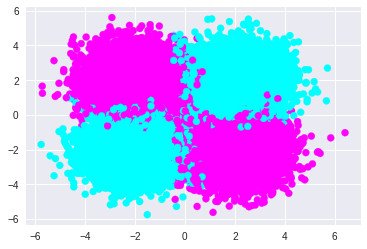

In [6]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

nb_samples=20000
valid_split = 0.2
test_split = 0.1
samples=np.zeros(nb_samples, dtype=[('input', float, 2), ('output', float, 1)])
for i in range(0,nb_samples,4):
    noise = np.random.normal(0,1,8)
    samples[i] = (-2+noise[0],-2+noise[1]), 0
    samples[i+1] = (2+noise[2],-2+noise[3]), 1
    samples[i+2] = (-2+noise[4],2+noise[5]), 1
    samples[i+3] = (2+noise[6],2+noise[7]), 0

fig1=plt.figure()
plt.scatter(samples['input'][:,0],samples['input'][:,1],c=samples['output'][:], cmap=plt.cm.cool)

samples_train = samples[0:int(nb_samples*(1-valid_split-test_split))]
samples_valid = samples[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]
samples_test  = samples[int(nb_samples*(1-test_split)):]
    
# standardise
scaler = preprocessing.StandardScaler().fit(samples_train['input'])
samples_train['input'] = scaler.transform(samples_train['input'])
samples_valid['input'] = scaler.transform(samples_valid['input'])
samples_test['input'] = scaler.transform(samples_test['input'])

(14000, 2)
(14000,)
(14000, 2)
(14000, 1)
train loss 0.40856633
train loss 0.09305374
train loss 0.024555672
train loss 0.040205605
train loss 0.03644228
train loss 0.006444494
train loss 0.040625855
train loss 0.048027292
train loss 0.0074576484
train loss 0.05931112
---------
Variables: name (type shape) [size]
---------
Variable:0 (float32_ref 2x8) [16, bytes: 64]
Variable_1:0 (float32_ref 8) [8, bytes: 32]
WSGAF/alphas:0 (float32_ref 8) [8, bytes: 32]
WSGAF/betas:0 (float32_ref 8) [8, bytes: 32]
WSGAF/gammas:0 (float32_ref 8) [8, bytes: 32]
Variable_2:0 (float32_ref 8x1) [8, bytes: 32]
Variable_3:0 (float32_ref 1) [1, bytes: 4]
WSGAF_1/alphas:0 (float32_ref 1) [1, bytes: 4]
WSGAF_1/betas:0 (float32_ref 1) [1, bytes: 4]
WSGAF_1/gammas:0 (float32_ref 1) [1, bytes: 4]
Total size of variables: 60
Total bytes of variables: 240
Test MSE: 0.035947


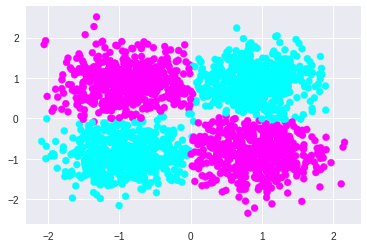

In [7]:
# We create a simple model to fit the XOR problem

tf.reset_default_graph()
sess_xor = tf.Session()



x = tf.placeholder(tf.float32, shape=[None, 2])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

# Shorthand methods for variable declaration
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1, name="weights")
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


# A fully connected layer
W_fc1 = weight_variable([2, 8])
b_fc1 = bias_variable([8])

h_fc1 = WSGAF(tf.matmul(x, W_fc1) + b_fc1)

# Output layer
W_fc2 = weight_variable([8, 1])
b_fc2 = bias_variable([1])

y=WSGAF(tf.matmul(h_fc1, W_fc2) + b_fc2)






mse =  tf.reduce_mean(tf.squared_difference(y_, y)) # cost function
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(mse) # optimizer

print(samples_train['input'].shape)
print(samples_train['output'].shape)
xor_train_x = samples_train['input'].reshape(-1,2)
xor_train_y = samples_train['output'].reshape(-1,1)

xor_test_x = samples_test['input'].reshape(-1,2)
xor_test_y = samples_test['output'].reshape(-1,1)
print(xor_train_x.shape)
print(xor_train_y.shape)

sess_xor.run(tf.global_variables_initializer())

batch_counter=0
batch_size_xor = 10
for i in range(10000): # Train network in 10000 steps
    if i%1000 == 0:
      train_loss = mse.eval(session=sess_xor, feed_dict={x: xor_train_x[batch_counter*batch_size_xor:(batch_counter+1)*batch_size_xor],
                                                         y_: xor_train_y[batch_counter*batch_size_xor:(batch_counter+1)*batch_size_xor]})
      print("train loss", train_loss)

    train_step.run(session=sess_xor, feed_dict={x: xor_train_x[batch_counter*batch_size_xor:(batch_counter+1)*batch_size_xor],\
                                                y_: xor_train_y[batch_counter*batch_size_xor:(batch_counter+1)*batch_size_xor]})
    batch_counter=batch_counter+1
    if (batch_counter*batch_size_xor > len(xor_train_x)):
        batch_counter=0



preds = sess_xor.run(y, feed_dict={x: xor_test_x}) # mse.eval(session=sess_xor, feed_dict={x: xor_test_x, y_: xor_test_y})

import tensorflow.contrib.slim as slim
def model_summary():
    model_vars = tf.trainable_variables()
    slim.model_analyzer.analyze_vars(model_vars, print_info=True)

model_summary()

# Error on test data
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(xor_test_y,preds)
print("Test MSE: %f" % (test_mse))
# Display predictions on test data
fig1=plt.figure()
plt.scatter(xor_test_x[:,0], \
            xor_test_x[:,1], \
            c=np.round(preds[:,0]), cmap=plt.cm.cool)


# Baseline test on MNIST data

In this section we do a simple regression on the MNIST dataset to measure baseline performance

In [0]:
# Convolutional network
tf.reset_default_graph()
sess = tf.Session()
# input, output
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
# wieights matrix and bias vector
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
# initialise
sess.run(tf.global_variables_initializer())
# regression
y = tf.nn.softmax(tf.matmul(x,W) + b)
# cost function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
# optimization
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
# training 1000 epoch, batch_size
batch_counter=0
#batch size
batch_size=128
for i in range(1000):
    train_step.run(session=sess, feed_dict={x: x_train_mnist[batch_counter*batch_size:(batch_counter+1)*batch_size], y_: y_train_mnist[batch_counter*batch_size:(batch_counter+1)*batch_size]})
    batch_counter=batch_counter+1
    if (batch_counter*batch_size > len(x_train_mnist)):
        batch_counter=0

In [9]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(session=sess, feed_dict={x: x_test_mnist, y_: y_test_mnist}))



0.917


# ReLU vs WSGAF with convolution on MNIST

In the following section, we compare the performance of WSGAF to that of the ReLU activation

In [0]:
# initialise variables 
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1, name="weights")
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# convolutional and max-pool layers initialization
def conv2d(x, W, name):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME', name=name)

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')

#batch size
batch_size=128

# building network structure
tf.reset_default_graph()
sess = tf.Session()
# input, output
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

# first convolutional layer 1@28x28,f:5x5@32,z:2x2
x_image_relu = tf.reshape(x, [-1,28,28,1])
x_image_wsgaf = tf.reshape(x, [-1,28,28,1])

W_conv1_relu = weight_variable([5, 5, 1, 32])
b_conv1_relu = bias_variable([32])

W_conv1_wsgaf = weight_variable([5, 5, 1, 32])
b_conv1_wsgaf = bias_variable([32])

h_conv1_relu = tf.nn.relu(conv2d(x_image_relu, W_conv1_relu, "h_conv1") + b_conv1_relu) # 28x28 ---> 28x28
h_pool1_relu = max_pool_2x2(h_conv1_relu) # 28x28 ---> 14x14

h_conv1_wsgaf = WSGAF(conv2d(x_image_wsgaf, W_conv1_wsgaf, "h_conv1") + b_conv1_wsgaf) # 28x28 ---> 28x28
h_pool1_wsgaf = max_pool_2x2(h_conv1_wsgaf) # 28x28 ---> 14x14

# second convolutional layer 32@14x14,f:5x5@64,z:2x2
W_conv2_relu = weight_variable([5, 5, 32, 64])
b_conv2_relu = bias_variable([64])

W_conv2_wsgaf = weight_variable([5, 5, 32, 64])
b_conv2_wsgaf = bias_variable([64])

h_conv2_relu = tf.nn.relu(conv2d(h_pool1_relu, W_conv2_relu, "h_conv2") + b_conv2_relu) # 14x14 ---> 14x14
h_pool2_relu = max_pool_2x2(h_conv2_relu) # 14x14 ---> 7x7

h_conv2_wsgaf = WSGAF(conv2d(h_pool1_wsgaf, W_conv2_wsgaf, "h_conv2") + b_conv2_wsgaf) # 14x14 ---> 14x14
h_pool2_wsgaf = max_pool_2x2(h_conv2_wsgaf) # 14x14 ---> 7x7

# TODO: add further convolution layers

# fully connected layers
W_fc1_relu = weight_variable([7 * 7 * 64, 1024])
b_fc1_relu = bias_variable([1024])

W_fc1_wsgaf = weight_variable([7 * 7 * 64, 1024])
b_fc1_wsgaf = bias_variable([1024])

h_pool2_flat_relu = tf.reshape(h_pool2_relu, [-1, 7*7*64])
h_fc1_relu = tf.nn.relu(tf.matmul(h_pool2_flat_relu, W_fc1_relu) + b_fc1_relu)

h_pool2_flat_wsgaf = tf.reshape(h_pool2_wsgaf, [-1, 7*7*64])
h_fc1_wsgaf = WSGAF(tf.matmul(h_pool2_flat_wsgaf, W_fc1_wsgaf) + b_fc1_wsgaf)

# dropout before the output layers
keep_prob_relu = tf.placeholder(tf.float32)
h_fc1_drop_relu = tf.nn.dropout(h_fc1_relu, keep_prob_relu)

keep_prob_wsgaf = tf.placeholder(tf.float32)
h_fc1_drop_wsgaf = tf.nn.dropout(h_fc1_wsgaf, keep_prob_wsgaf)

# output softmax layer
W_fc2_relu = weight_variable([1024, 10])
b_fc2_relu = bias_variable([10])

W_fc2_wsgaf = weight_variable([1024, 10])
b_fc2_wsgaf = bias_variable([10])

y_conv_relu=tf.nn.softmax(tf.matmul(h_fc1_drop_relu, W_fc2_relu) + b_fc2_relu)
y_conv_wsgaf=tf.nn.softmax(tf.matmul(h_fc1_drop_wsgaf, W_fc2_wsgaf) + b_fc2_wsgaf)

step 0, RELU: training loss 7.4828, valid loss 7.47191 | WSGAF: training loss 6.15678, valid loss 5.65556
step 10, RELU: training loss 1.4917, valid loss 1.42496 | WSGAF: training loss 1.82453, valid loss 1.75541
step 20, RELU: training loss 0.654189, valid loss 0.703903 | WSGAF: training loss 0.839007, valid loss 0.878147
step 30, RELU: training loss 0.268353, valid loss 0.353754 | WSGAF: training loss 0.506701, valid loss 0.614329
step 40, RELU: training loss 0.311251, valid loss 0.262691 | WSGAF: training loss 0.511737, valid loss 0.430176
step 50, RELU: training loss 0.263208, valid loss 0.251807 | WSGAF: training loss 0.406118, valid loss 0.425831
step 60, RELU: training loss 0.190462, valid loss 0.206426 | WSGAF: training loss 0.405286, valid loss 0.332236
step 70, RELU: training loss 0.157991, valid loss 0.189776 | WSGAF: training loss 0.222985, valid loss 0.290912
step 80, RELU: training loss 0.254909, valid loss 0.178722 | WSGAF: training loss 0.412616, valid loss 0.322911
ste

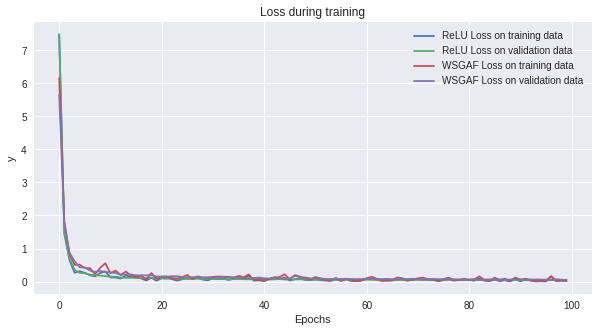

In [11]:
# train both models

cross_entropy_relu = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv_relu), reduction_indices=[1]))
train_step_relu = tf.train.AdamOptimizer(0.001).minimize(cross_entropy_relu)
correct_prediction_relu = tf.equal(tf.argmax(y_conv_relu,1), tf.argmax(y_,1))
accuracy_relu = tf.reduce_mean(tf.cast(correct_prediction_relu, tf.float32))

cross_entropy_wsgaf = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv_wsgaf), reduction_indices=[1]))
train_step_wsgaf = tf.train.AdamOptimizer(0.001).minimize(cross_entropy_wsgaf)
correct_prediction_wsgaf = tf.equal(tf.argmax(y_conv_wsgaf,1), tf.argmax(y_,1))
accuracy_wsgaf = tf.reduce_mean(tf.cast(correct_prediction_wsgaf, tf.float32))

sess.run(tf.global_variables_initializer())
batch_counter=0

losses_relu = [] # on training data
valid_losses_relu = [] # on validation data

losses_wsgaf = [] # on training data
valid_losses_wsgaf = [] # on validation data
step_n = 0

for i in range(1000): # TODO: improve training procedure to do multiple epochs instead of only 1000 steps
    if i%10 == 0:
        train_accuracy_relu = cross_entropy_relu.eval(session=sess, feed_dict={x: x_train_mnist[batch_counter*batch_size:(batch_counter+1)*batch_size], y_: y_train_mnist[batch_counter*batch_size:(batch_counter+1)*batch_size], keep_prob_relu: 1.0})
        valid_accuracy_relu = cross_entropy_relu.eval(session=sess, feed_dict={x: x_valid_mnist, y_: y_valid_mnist, keep_prob_relu: 1.0})
        
        train_accuracy_wsgaf = cross_entropy_wsgaf.eval(session=sess, feed_dict={x: x_train_mnist[batch_counter*batch_size:(batch_counter+1)*batch_size], y_: y_train_mnist[batch_counter*batch_size:(batch_counter+1)*batch_size], keep_prob_wsgaf: 1.0})
        valid_accuracy_wsgaf = cross_entropy_wsgaf.eval(session=sess, feed_dict={x: x_valid_mnist, y_: y_valid_mnist, keep_prob_wsgaf: 1.0})
        print("step %d, RELU: training loss %g, valid loss %g | WSGAF: training loss %g, valid loss %g" % (i, train_accuracy_relu, valid_accuracy_relu, train_accuracy_wsgaf, valid_accuracy_wsgaf))
        
        losses_relu.append(train_accuracy_relu)
        valid_losses_relu.append(valid_accuracy_relu)
        
        losses_wsgaf.append(train_accuracy_wsgaf)
        valid_losses_wsgaf.append(valid_accuracy_wsgaf)
        
        step_n = step_n+1
    train_step_relu.run(session=sess, feed_dict={x: x_train_mnist[batch_counter*batch_size:(batch_counter+1)*batch_size], y_: y_train_mnist[batch_counter*batch_size:(batch_counter+1)*batch_size], keep_prob_relu: 0.5})
    
    train_step_wsgaf.run(session=sess, feed_dict={x: x_train_mnist[batch_counter*batch_size:(batch_counter+1)*batch_size], y_: y_train_mnist[batch_counter*batch_size:(batch_counter+1)*batch_size], keep_prob_wsgaf: 0.5})
    
    batch_counter=batch_counter+1
    if (batch_counter*batch_size > len(x_train_mnist)):
        batch_counter=0    

print("test accuracy RELU %g" % accuracy_relu.eval(session=sess, feed_dict={x: x_test_mnist, y_: y_test_mnist, keep_prob_relu: 1.0}))
print("test accuracy WSGAF %g" % accuracy_wsgaf.eval(session=sess, feed_dict={x: x_test_mnist, y_: y_test_mnist, keep_prob_wsgaf: 1.0}))

plt.figure(figsize=(10, 5))
plt.title('Loss during training')
plt.plot(np.arange(step_n), losses_relu, label='ReLU Loss on training data') 
plt.plot(np.arange(step_n), valid_losses_relu, label='ReLU Loss on validation data')

plt.plot(np.arange(step_n), losses_wsgaf, label='WSGAF Loss on training data') 
plt.plot(np.arange(step_n), valid_losses_wsgaf, label='WSGAF Loss on validation data')
plt.legend(loc='upper right')
plt.xlabel('Steps')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Inception Resnet V2

In the following sections, we implement the training of Inception Resnet V2. Problems arrose when trying to run this on colab, as the model does not fit into the provided resources on colab.

In [13]:
!git clone https://github.com/tensorflow/models/

Cloning into 'models'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 22544 (delta 0), reused 3 (delta 0), pack-reused 22532
Receiving objects: 100% (22544/22544), 559.99 MiB | 27.98 MiB/s, done.
Resolving deltas: 100% (13363/13363), done.
Checking out files: 100% (2836/2836), done.


In [14]:
!wget http://download.tensorflow.org/models/inception_resnet_v2_2016_08_30.tar.gz
!tar -xvf inception_resnet_v2_2016_08_30.tar.gz

--2018-11-04 17:50:39--  http://download.tensorflow.org/models/inception_resnet_v2_2016_08_30.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.15.128, 2a00:1450:400c:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.15.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220632346 (210M) [application/x-tar]
Saving to: ‘inception_resnet_v2_2016_08_30.tar.gz’

inception_resnet_v2 100%[===================>] 210.41M  79.5MB/s    in 2.6s    

2018-11-04 17:50:42 (79.5 MB/s) - ‘inception_resnet_v2_2016_08_30.tar.gz’ saved [220632346/220632346]

inception_resnet_v2_2016_08_30.ckpt


In [15]:
!wget https://i.imgur.com/hURWHq0.png

--2018-11-04 17:50:51--  https://i.imgur.com/hURWHq0.png
Resolving i.imgur.com (i.imgur.com)... 151.101.120.193
Connecting to i.imgur.com (i.imgur.com)|151.101.120.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243234 (238K) [image/png]
Saving to: ‘hURWHq0.png’

hURWHq0.png         100%[===================>] 237.53K  --.-KB/s    in 0.02s   

2018-11-04 17:50:51 (10.4 MB/s) - ‘hURWHq0.png’ saved [243234/243234]



In [16]:
!ls "models/research/slim/datasets"

build_imagenet_data.py		  flowers.py
cifar10.py			  imagenet_2012_validation_synset_labels.txt
dataset_factory.py		  imagenet_lsvrc_2015_synsets.txt
dataset_utils.py		  imagenet_metadata.txt
download_and_convert_cifar10.py   imagenet.py
download_and_convert_flowers.py   __init__.py
download_and_convert_imagenet.sh  mnist.py
download_and_convert_mnist.py	  preprocess_imagenet_validation_data.py
download_imagenet.sh		  process_bounding_boxes.py


In [17]:
!ls

hURWHq0.png			       models
inception_resnet_v2_2016_08_30.ckpt    sample_data
inception_resnet_v2_2016_08_30.tar.gz


In [0]:
import sys

sys.path.append('models/research/slim')
from datasets import imagenet

In [19]:
# Test Inception ResNet V2 with the pretrained model.

import tensorflow as tf
import numpy as np
import cv2
# import from tensorflow models

#Load the definitions of Inception-Resnet-v2 architecture
import tensorflow.contrib.slim as slim
from models.research.slim.nets.inception_resnet_v2 import inception_resnet_v2, inception_resnet_v2_arg_scope


#The pretrained model accepts size of 299x299 images
HEIGHT = 299
WIDTH = 299
CHANNELS = 3

# Create Graph

graph = tf.Graph()
with graph.as_default():

  # Create a placeholder to pass the input image
  img_tensor = tf.placeholder(tf.float32, shape=(None, HEIGHT, WIDTH, CHANNELS))

  # Scale the image inputs to {+1, -1} from 0 to 255
  img_scaled = tf.scalar_mul((1.0/255), img_tensor)
  img_scaled = tf.subtract(img_scaled, 0.5)
  img_scaled = tf.multiply(img_scaled, 2.0)

  # load Graph definitions
  with slim.arg_scope(inception_resnet_v2_arg_scope()):
    logits, end_points = inception_resnet_v2(img_scaled, is_training=False)

  # predict the class
  predictions = end_points['Predictions']

#Loading a test image 
img = cv2.imread('hURWHq0.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (WIDTH, HEIGHT))

# make the input size [BATCH, WIDTH, HEIGHT, CHANNELS] for the network
img = np.expand_dims(img, axis=0)

#for labels of imagenet 
sys.path.append('models/research/slim')
from datasets import imagenet

# Inception resnet v2 model 
checkpoint_file='inception_resnet_v2_2016_08_30.ckpt'

with tf.Session(graph=graph) as sess:
  saver = tf.train.Saver()
  saver.restore(sess, checkpoint_file)

  pred_prob= sess.run(predictions, feed_dict={img_tensor:img})

  # Getting the top 5 classes of the imagenet database
  probabilities = pred_prob[0, 0:]
  sorted_inds = [i[0] for i in sorted(enumerate(-probabilities), key=lambda x:x[1])]

  names = imagenet.create_readable_names_for_imagenet_labels()
  for i in range(5):
    index = sorted_inds[i]
    print('Probability %0.2f%% => [%s]' % (probabilities[index], names[index]))


INFO:tensorflow:Restoring parameters from inception_resnet_v2_2016_08_30.ckpt
Probability 0.35% => [malinois]
Probability 0.20% => [Chesapeake Bay retriever]
Probability 0.07% => [kelpie]
Probability 0.03% => [tennis ball]
Probability 0.03% => [Border terrier]


In [0]:
# Create input for the model, so we can pass the CIFAR-10 images to it


import tensorflow as tf
import numpy as np
import cv2
# import from tensorflow models
#sys.path.append('/home/vijay/workspace/learning/tensorflow/')

#Load the definitions of Inception-Resnet-v2 architecture
import tensorflow.contrib.slim as slim
from models.research.slim.nets.inception_resnet_v2 import inception_resnet_v2, inception_resnet_v2_arg_scope


# CIFAR-10 parameters
HEIGHT = 32
WIDTH = 32
CHANNELS = 3
NUM_CLASSES = 10

# Create Graph
tf.reset_default_graph()
graph = tf.Graph()
with graph.as_default():

  # Create a placeholder to pass the input image
  img_tensor = tf.placeholder(tf.float32, shape=(None, HEIGHT, WIDTH, CHANNELS))
  y_ = tf.placeholder(tf.float32, shape=[None, 10]) # placeholder for expected output
  
  # Scale the image inputs to {+1, -1} from 0 to 255
  img_scaled = tf.image.resize_images(img_tensor, [299, 299])
  img_scaled = tf.scalar_mul((1.0/255), img_scaled)
  img_scaled = tf.subtract(img_scaled, 0.5)
  img_scaled = tf.multiply(img_scaled, 2.0)

  # load Graph definitions
  with slim.arg_scope(inception_resnet_v2_arg_scope()):
    logits, end_points = inception_resnet_v2(img_scaled, is_training=True, activation_fn=tf.nn.relu, num_classes=NUM_CLASSES) # TODO: train with WSGAF

  # predict the class
  predictions = end_points['Predictions']



step 0, InceptResnetV2: training loss 2.36691, valid loss 0
step 10, InceptResnetV2: training loss 2.13512, valid loss 0
step 20, InceptResnetV2: training loss 2.64583, valid loss 0
step 30, InceptResnetV2: training loss 1.8317, valid loss 0
step 40, InceptResnetV2: training loss 2.60748, valid loss 0
step 50, InceptResnetV2: training loss 2.29106, valid loss 0
step 60, InceptResnetV2: training loss 1.76627, valid loss 0
step 70, InceptResnetV2: training loss 1.73564, valid loss 0
step 80, InceptResnetV2: training loss 1.88556, valid loss 0
step 90, InceptResnetV2: training loss 1.83872, valid loss 0
step 100, InceptResnetV2: training loss 2.24818, valid loss 0
step 110, InceptResnetV2: training loss 1.873, valid loss 0
step 120, InceptResnetV2: training loss 2.03488, valid loss 0
step 130, InceptResnetV2: training loss 1.58578, valid loss 0
step 140, InceptResnetV2: training loss 1.33415, valid loss 0
step 150, InceptResnetV2: training loss 2.08669, valid loss 0
step 160, InceptResnet

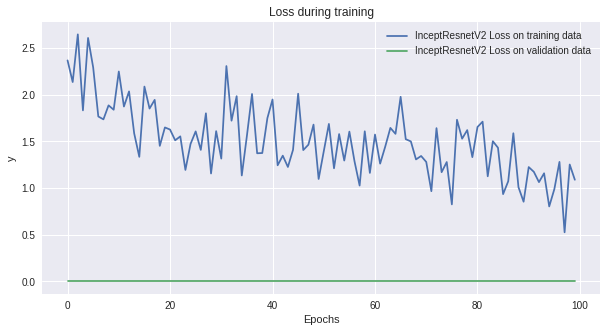

In [16]:
# Train the model. Running this block takes about half an hour, and the model barely learns anything.

with tf.Session(graph=graph) as sess:
  cross_entropy_InceptResnetV2 = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(predictions), reduction_indices=[1]))
  train_step_InceptResnetV2 = tf.train.AdamOptimizer(0.0001).minimize(cross_entropy_InceptResnetV2)
  correct_prediction_InceptResnetV2 = tf.equal(tf.argmax(predictions,1), tf.argmax(y_,1))
  accuracy_InceptResnetV2 = tf.reduce_mean(tf.cast(correct_prediction_InceptResnetV2, tf.float32))

  sess.run(tf.global_variables_initializer())
  batch_counter=0

  losses_InceptResnetV2 = [] # on training data
  valid_losses_InceptResnetV2 = [] # on validation data

  step_n = 0
  batch_size = 20 # higher batch size causes OOM
  run_options = tf.RunOptions(report_tensor_allocations_upon_oom = True)
  for i in range(1000):
      if i%10 == 0:
          train_accuracy_InceptResnetV2 = sess.run(cross_entropy_InceptResnetV2, options=run_options, feed_dict={img_tensor: x_train_cifar10[batch_counter*batch_size:(batch_counter+1)*batch_size], y_: y_train_cifar10[batch_counter*batch_size:(batch_counter+1)*batch_size]})
          #valid_accuracy_InceptResnetV2 = sess.run(cross_entropy_InceptResnetV2, options=run_options, feed_dict={img_tensor: [x_valid_cifar10[0]], y_: [y_valid_cifar10[0]]})
          valid_accuracy_InceptResnetV2 = 0
          
          print("step %d, InceptResnetV2: training loss %g, valid loss %g" % (i, train_accuracy_InceptResnetV2, valid_accuracy_InceptResnetV2))
        
          losses_InceptResnetV2.append(train_accuracy_InceptResnetV2)
          valid_losses_InceptResnetV2.append(valid_accuracy_InceptResnetV2)
        
          step_n = step_n+1
      train_step_InceptResnetV2.run(session=sess, feed_dict={img_tensor: x_train_cifar10[batch_counter*batch_size:(batch_counter+1)*batch_size], y_: y_train_cifar10[batch_counter*batch_size:(batch_counter+1)*batch_size]})
    
      batch_counter=batch_counter+1
      if (batch_counter*batch_size > len(x_train_cifar10)):
          batch_counter=0    

  #print("test accuracy InceptResnetV2 %g" % sess.run(accuracy_InceptResnetV2, options=run_options, feed_dict={img_tensor: x_test_cifar10, y_: y_test_cifar10}))

  plt.figure(figsize=(10, 5))
  plt.title('Loss during training')
  plt.plot(np.arange(step_n), losses_InceptResnetV2, label='InceptResnetV2 Loss on training data') 
  plt.plot(np.arange(step_n), valid_losses_InceptResnetV2, label='InceptResnetV2 Loss on validation data')

  plt.legend(loc='upper right')
  plt.xlabel('Epochs')
  plt.ylabel('y')
  plt.grid(True)
  plt.show()
  
  